In [28]:
file="all_combined_DEG.tsv"
import pandas as pd
df = pd.read_csv(file,sep="\t",dtype=str)
df.avg_log2FC = df.avg_log2FC.astype(float)

In [29]:
df.head()

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,fdr,Cluster,geneName,ENTREZID,group,myCluster
0,5.75606028502373e-81,0.847197,0.346,0.005,1.78742940030842e-76,6.90727234202848e-79,LT-HSC.1,Trim12a,76681,UP,LT-HSC.1
1,5.79179882267955e-64,-1.119813,0.008,0.442,1.79852728840668e-59,3.47507929360773e-62,LT-HSC.1,Echdc2,52430,DN,LT-HSC.1
2,8.27615157894172e-55,0.526138,1,1,2.56999334980877e-50,3.31046063157669e-53,LT-HSC.1,Gm42418,NaN,UP,LT-HSC.1
3,4.34452157455715e-39,-0.310458,1,1,1.34910428454723e-34,1.30335647236714e-37,LT-HSC.1,Rpl35a,57808,DN,LT-HSC.1
4,1.98473710250488e-32,-0.239128,1,1,6.16320412440842e-28,4.76336904601172e-31,LT-HSC.1,Rps29,20090,DN,LT-HSC.1


In [3]:
from gseapy.plot import gseaplot, heatmap


Creating directory /home/yli11/.config/bioservices 


In [4]:
import gseapy as gp


In [66]:
for c in df.Cluster.unique():
    tmp = df[df.Cluster==c]
    tmp = tmp[['geneName','avg_log2FC']]
    # tmp.geneName = tmp.geneName.str.upper()
    tmp = tmp.sort_values('avg_log2FC',ascending=False)
    tmp = tmp.reset_index(drop=True)
    tmp.columns = [0,1]
    pre_res = gp.prerank(rnk=tmp, gene_sets='Mouse_GO_AllPathways_with_GO_iea_February_01_2022_symbol.gmt',
                         processes=4,
                         permutation_num=10, # reduce number to speed up testing
                         outdir='test/prerank_report_kegg', format='png', seed=6)    
    gsea_results = pre_res.res2d.sort_values("fdr")
    gsea_results.to_csv(f"GSEA.{c}.csv")

In [39]:
tmp = df[df.Cluster=="LT-HSC.1"]
tmp = tmp[['geneName','avg_log2FC']]
# tmp.geneName = tmp.geneName.str.upper()
tmp = tmp.sort_values('avg_log2FC',ascending=False)
tmp = tmp.reset_index(drop=True)
tmp.columns = [0,1]
tmp.head()

,0,1
0,Trim12a,0.847197
1,Gm42418,0.526138
2,Apoe,0.471160
3,Gdpd3,0.419721
4,H2-Eb1,0.405669


In [12]:
?gp.prerank

Signature:
gp.prerank(
    rnk,
    gene_sets,
    outdir='GSEA_Prerank',
    pheno_pos='Pos',
    pheno_neg='Neg',
    min_size=15,
    max_size=500,
    permutation_num=1000,
    weighted_score_type=1,
    ascending=False,
    processes=1,
    figsize=(6.5, 6),
    format='pdf',
    graph_num=20,
    no_plot=False,
    seed=None,
    verbose=False,
)
Docstring:
Run Gene Set Enrichment Analysis with pre-ranked correlation defined by user.

:param rnk: pre-ranked correlation table or pandas DataFrame. Same input with ``GSEA`` .rnk file.
:param gene_sets: Enrichr Library name or .gmt gene sets file or dict of gene sets. Same input with GSEA.
:param outdir: results output directory.
:param int permutation_num: Number of permutations for significance computation. Default: 1000.
:param int min_size: Minimum allowed number of genes from gene set also the data set. Default: 15.
:param int max_size: Maximum allowed number of genes from gene set also the data set. Defaults: 500.
:param str wei

In [34]:
pre_res = gp.prerank(rnk=tmp, gene_sets='KEGG_2019_Mouse',
                     processes=4,
                     permutation_num=10, # reduce number to speed up testing
                     outdir='test/prerank_report_kegg', format='png', seed=6)

In [53]:
pre_res = gp.prerank(rnk=tmp, gene_sets='Mouse_GO_AllPathways_with_GO_iea_February_01_2022_symbol.gmt',
                     processes=4,
                     permutation_num=10, # reduce number to speed up testing
                     outdir='test/prerank_report_kegg', format='png', seed=6)

In [54]:
gsea_results = pre_res.res2d.sort_values("fdr")


In [63]:
gsea_results.to_csv("GSEA.results.csv")

In [58]:
term

'regulation of RNA biosynthetic process%GObp%GO:2001141'

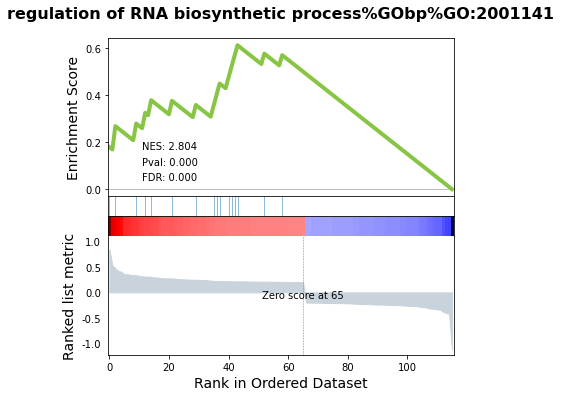

In [61]:
import matplotlib.pyplot as plt

i=3
term = gsea_results.index[i]

gseaplot(pre_res.ranking, term=term, **pre_res.results[term])
plt.savefig(f"GSEA{i}.pdf",bbox_inches='tight')


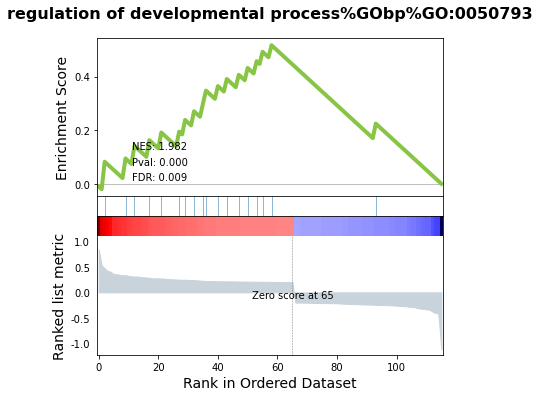

In [64]:
import matplotlib.pyplot as plt

i=66
term = gsea_results.index[i]

gseaplot(pre_res.ranking, term=term, **pre_res.results[term])
plt.savefig(f"GSEA{i}.pdf",bbox_inches='tight')


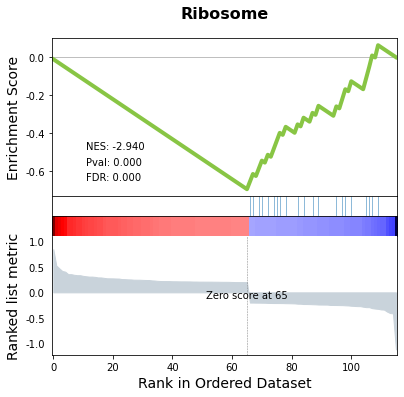

In [37]:
terms = pre_res.res2d.index

gseaplot(pre_res.ranking, term=terms[0], **pre_res.results[terms[0]])


In [ ]:
Mouse_GO_AllPathways_with_GO_iea_February_01_2022_symbol.gmt

In [10]:
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'DisGeNET',
 'Disease_Perturbations_from_GEO_down',
 'Disease_Perturbati

In [67]:
tmp = df[df.Cluster=="LT-HSC.1"]
tmp = tmp[['geneName','avg_log2FC']]
# tmp.geneName = tmp.geneName.str.upper()
tmp = tmp.sort_values('avg_log2FC',ascending=False)
tmp = tmp.reset_index(drop=True)
tmp.columns = [0,1]
LTHSC1_GSEA = gp.prerank(rnk=tmp, gene_sets='Mouse_GO_AllPathways_with_GO_iea_February_01_2022_symbol.gmt',
                     processes=4,
                     permutation_num=10, # reduce number to speed up testing
                     outdir='test/prerank_report_kegg', format='png', seed=6)   

In [68]:
gsea_results = LTHSC1_GSEA.res2d.sort_values("fdr")
gsea_results

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
CYTOPLASMIC RIBOSOMAL PROTEINS%WIKIPATHWAYS_20220110%WP163%MUS MUSCULUS,-0.683673,-2.474804,0.00,0.000000,77,18,Rps28;Rpl32;Rps12;Rpl37;Fau;Rpl36;Rps20;Rpl38;...,Rps28;Rpl32;Rps12;Rpl37;Fau;Rpl36;Rps20;Rpl38;...
positive regulation of signaling%GObp%GO:0023056,0.570745,2.299427,0.00,0.000000,1921,15,Trim12a;Apoe;Wdfy1;Trim34a;Tnfsf10;Wnk1;Akap13...,Trim12a;Apoe;Wdfy1;Trim34a;Tnfsf10;Wnk1;Akap13...
protein binding%GOmf%GO:0005515,0.493754,3.322185,0.00,0.000000,9602,56,Trim12a;Apoe;H2-Eb1;H2-Q7;Jund;Wdfy1;H2-Q4;Lmo...,Trim12a;Apoe;H2-Eb1;H2-Q7;Jund;Wdfy1;H2-Q4;Lmo...
regulation of RNA biosynthetic process%GObp%GO:2001141,0.612172,2.804016,0.00,0.000000,3283,16,Trim12a;Apoe;Jund;Lmo2;Trim34a;Stat1;Stat3;Run...,Trim12a;Apoe;Jund;Lmo2;Trim34a;Stat1;Stat3;Run...
regulation of cell differentiation%GObp%GO:0045595,0.521296,2.336786,0.00,0.000000,1690,15,Apoe;Jund;Lmo2;Mpl;Stat1;Numa1;Stat3;Glg1;Runx...,Apoe;Jund;Lmo2;Mpl;Stat1;Numa1;Stat3;Glg1;Runx...
...,...,...,...,...,...,...,...,...
molecular function regulator%GOmf%GO:0098772,0.177459,0.724076,0.75,0.868478,1915,17,Apoe;Tnfsf10;Ly6a;Wnk1;Akap13;Ltb;Aplp2;Ncor1;...,Apoe;Tnfsf10;Ly6a;Wnk1;Akap13;Ltb;Aplp2;Ncor1;...
organelle organization%GObp%GO:0006996,0.145473,0.509755,1.00,0.980932,3274,17,Tspan32;Meg3;Numa1;Stat3;Arid1b;Tmed5;Ncor1;Gc...,Tspan32;Meg3;Numa1;Stat3;Arid1b;Tmed5;Ncor1;Gc...
heterocyclic compound binding%GOmf%GO:1901363,-0.122281,-0.521763,1.00,0.983461,5474,30,Jund;Lmo2;Tap1;Stat1;Wnk1;Stat3;Runx1;Maf;Arid...,Snrpf;Rps26;Rpl41;Mpo;Rpl22l1


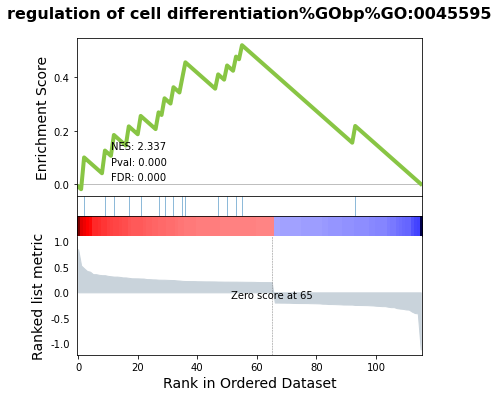

In [71]:

term = "regulation of cell differentiation%GObp%GO:0045595"

gseaplot(LTHSC1_GSEA.ranking, term=term, **LTHSC1_GSEA.results[term])
plt.savefig(f"{term}.pdf",bbox_inches='tight')


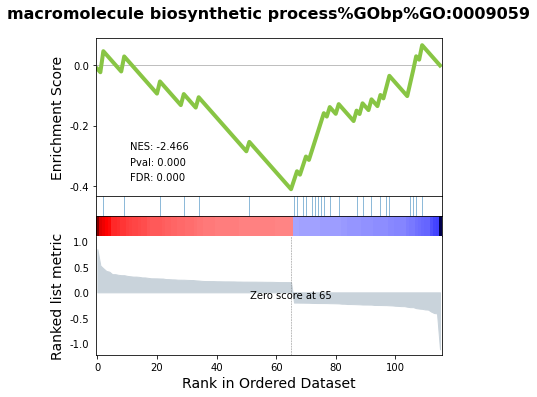

In [72]:

term = "macromolecule biosynthetic process%GObp%GO:0009059"

gseaplot(LTHSC1_GSEA.ranking, term=term, **LTHSC1_GSEA.results[term])
plt.savefig(f"{term}.pdf",bbox_inches='tight')


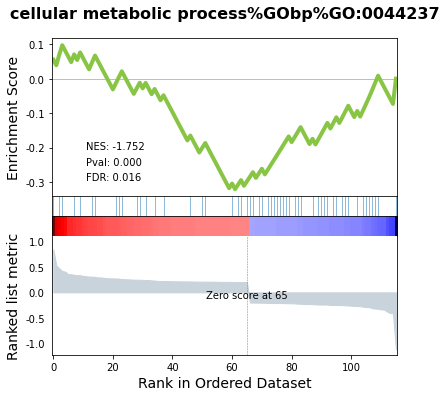

In [73]:

term = "cellular metabolic process%GObp%GO:0044237"

gseaplot(LTHSC1_GSEA.ranking, term=term, **LTHSC1_GSEA.results[term])
plt.savefig(f"{term}.pdf",bbox_inches='tight')


In [76]:
tmp = df[df.Cluster=="LT-HSC.2"]
tmp = tmp[['geneName','avg_log2FC']]
# tmp.geneName = tmp.geneName.str.upper()
tmp = tmp.sort_values('avg_log2FC',ascending=False)
tmp = tmp.reset_index(drop=True)
tmp.columns = [0,1]
LTHSC2_GSEA = gp.prerank(rnk=tmp, gene_sets='Mouse_GO_AllPathways_with_GO_iea_February_01_2022_symbol.gmt',
                     processes=4,
                     permutation_num=10, # reduce number to speed up testing
                     outdir='test/prerank_report_kegg', format='png', seed=6)   

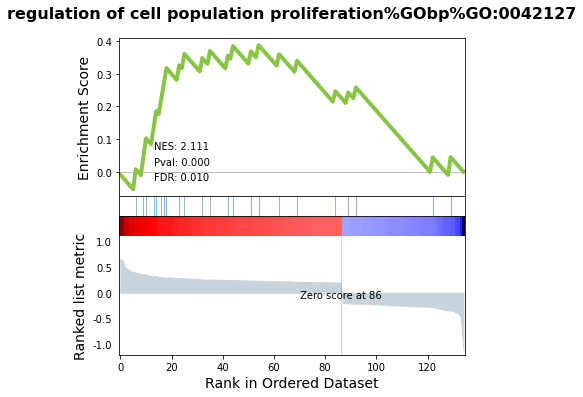

In [78]:

term = "regulation of cell population proliferation%GObp%GO:0042127"

gseaplot(LTHSC2_GSEA.ranking, term=term, **LTHSC2_GSEA.results[term])
plt.savefig(f"LTHSC2.{term}.pdf",bbox_inches='tight')


In [ ]:
cell differentiation%GObp%GO:0030154
cell periphery%GOcc%GO:0071944
response to stimulus%GObp%GO:0050896


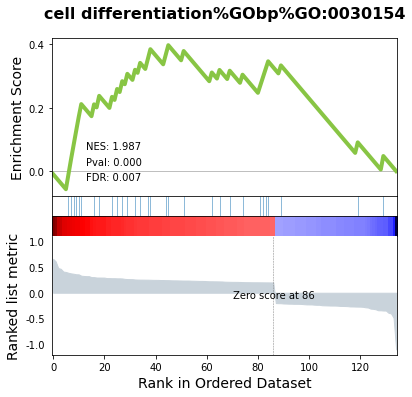

In [79]:

term = "cell differentiation%GObp%GO:0030154"

gseaplot(LTHSC2_GSEA.ranking, term=term, **LTHSC2_GSEA.results[term])
plt.savefig(f"LTHSC2.{term}.pdf",bbox_inches='tight')


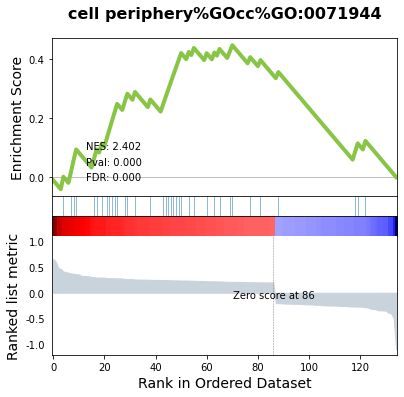

In [80]:

term = "cell periphery%GOcc%GO:0071944"

gseaplot(LTHSC2_GSEA.ranking, term=term, **LTHSC2_GSEA.results[term])
plt.savefig(f"LTHSC2.{term}.pdf",bbox_inches='tight')


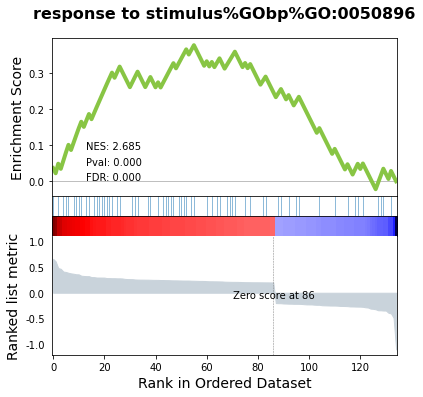

In [81]:

term = "response to stimulus%GObp%GO:0050896"

gseaplot(LTHSC2_GSEA.ranking, term=term, **LTHSC2_GSEA.results[term])
plt.savefig(f"LTHSC2.{term}.pdf",bbox_inches='tight')
